In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [56]:
# Set to folder path
season_folder = 's14_plots'
wills_file = './data/Yellowstone Magic Season 14 Vote Tracking (Responses) - Wills.csv'

### Importing and Data Cleaning

If you're trying to replicate with differently-structured input data, just try to get the set of dicts defined in the last cell of this section—one for the wills overall, and one per Will with key = player name and value = total votes for that will and player

In [2]:
wills_votes = pd.read_csv(wills_file)

In [3]:
wills_votes

,Unnamed: 0,Infuse,Alternate,Foreshadow,Revoke,Exchange,Trust,Enrich,Plunder,Unnamed: 9,Total
0,Washer Barajas,3595.0,502.0,0.0,0.0,55.0,625.0,0.0,0.0,NaN,4777.0
1,Kurt Crueller,0.0,0.0,3000.0,0.0,650.0,2838.0,0.0,0.0,NaN,6488.0
2,Francisco Preston,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0,NaN,156.0
3,Bevan Wise,653.0,0.0,0.0,0.0,0.0,373.0,0.0,0.0,NaN,1026.0
4,Bonk Jokes,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,NaN,10.0
5,Chorby Short,1.0,0.0,0.0,0.0,0.0,9972.0,0.0,0.0,NaN,9973.0
6,Tiana Wheeler,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,NaN,500.0
7,Eizabeth Elliott,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,NaN,10.0
8,Oscar Dollie,0.0,0.0,0.0,700.0,0.0,1433.0,0.0,0.0,NaN,2133.0
9,James Mora,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0


In [4]:
wills_votes = wills_votes.set_index(['Unnamed: 0'])

In [5]:
wills_votes

,Infuse,Alternate,Foreshadow,Revoke,Exchange,Trust,Enrich,Plunder,Unnamed: 9,Total
Unnamed: 0,,,,,,,,,,
Washer Barajas,3595.0,502.0,0.0,0.0,55.0,625.0,0.0,0.0,NaN,4777.0
Kurt Crueller,0.0,0.0,3000.0,0.0,650.0,2838.0,0.0,0.0,NaN,6488.0
Francisco Preston,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0,NaN,156.0
Bevan Wise,653.0,0.0,0.0,0.0,0.0,373.0,0.0,0.0,NaN,1026.0
Bonk Jokes,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,NaN,10.0
Chorby Short,1.0,0.0,0.0,0.0,0.0,9972.0,0.0,0.0,NaN,9973.0
Tiana Wheeler,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0,NaN,500.0
Eizabeth Elliott,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,NaN,10.0
Oscar Dollie,0.0,0.0,0.0,700.0,0.0,1433.0,0.0,0.0,NaN,2133.0


In [6]:
# Pandas was being annoying or I was being dense so I set the untargeted wills manually, will update eventually

wills_votes.loc['Untargeted',:] = 0
wills_votes.loc['Untargeted','Enrich'] = 382
wills_votes.loc['Untargeted','Plunder'] = 1720


In [7]:
wills_votes.drop(columns=['Unnamed: 9','Total'], index=[np.nan, 'Total'], inplace=True)

In [8]:
wills_votes

,Infuse,Alternate,Foreshadow,Revoke,Exchange,Trust,Enrich,Plunder
Unnamed: 0,,,,,,,,
Washer Barajas,3595.0,502.0,0.0,0.0,55.0,625.0,0.0,0.0
Kurt Crueller,0.0,0.0,3000.0,0.0,650.0,2838.0,0.0,0.0
Francisco Preston,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0
Bevan Wise,653.0,0.0,0.0,0.0,0.0,373.0,0.0,0.0
Bonk Jokes,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Chorby Short,1.0,0.0,0.0,0.0,0.0,9972.0,0.0,0.0
Tiana Wheeler,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0
Eizabeth Elliott,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Oscar Dollie,0.0,0.0,0.0,700.0,0.0,1433.0,0.0,0.0


In [9]:
wills_votes

,Infuse,Alternate,Foreshadow,Revoke,Exchange,Trust,Enrich,Plunder
Unnamed: 0,,,,,,,,
Washer Barajas,3595.0,502.0,0.0,0.0,55.0,625.0,0.0,0.0
Kurt Crueller,0.0,0.0,3000.0,0.0,650.0,2838.0,0.0,0.0
Francisco Preston,0.0,0.0,0.0,0.0,0.0,156.0,0.0,0.0
Bevan Wise,653.0,0.0,0.0,0.0,0.0,373.0,0.0,0.0
Bonk Jokes,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Chorby Short,1.0,0.0,0.0,0.0,0.0,9972.0,0.0,0.0
Tiana Wheeler,0.0,0.0,0.0,0.0,0.0,500.0,0.0,0.0
Eizabeth Elliott,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
Oscar Dollie,0.0,0.0,0.0,700.0,0.0,1433.0,0.0,0.0


In [10]:
wills_values = {
    column:sum(wills_votes[column]) for column in wills_votes
}


infuse_targets = {
    player: wills_votes.loc[player,'Infuse'] for player in wills_votes.index
}

trust_targets = {
    player: wills_votes.loc[player,'Trust'] for player in wills_votes.index

}

revoke_targets = {
    player: wills_votes.loc[player,'Revoke'] for player in wills_votes.index    
}

exchange_targets = {
    player: wills_votes.loc[player,'Exchange'] for player in wills_votes.index
}

foreshadow_targets = {
    player: wills_votes.loc[player,'Foreshadow'] for player in wills_votes.index
}

alternate_targets = {
    player: wills_votes.loc[player,'Alternate'] for player in wills_votes.index
}


### Sim

In [11]:
wills_ps = [will/sum(list(wills_values.values())) for will in wills_values.values()]
def draw_wills(wills=wills_values, ps = wills_ps): 
    return np.random.choice(list(wills.keys()), 2, False, ps)

infuse_ps = [player/sum(list(infuse_targets.values())) for player in infuse_targets.values()]
def draw_infuse(infuse_targets=infuse_targets, ps = infuse_ps):
    return np.random.choice(list(infuse_targets.keys()), 1, False, ps)[0]

trust_ps = [player/sum(list(trust_targets.values())) for player in trust_targets.values()]
def draw_trust(trust_targets=trust_targets, ps = trust_ps):
    return np.random.choice(list(trust_targets.keys()), 1, False, ps)[0]

revoke_ps = [player/sum(list(revoke_targets.values())) for player in revoke_targets.values()]
def draw_revoke(revoke_targets=revoke_targets, ps = revoke_ps):
    return np.random.choice(list(revoke_targets.keys()), 1, False, ps)[0]

exchange_ps = [player/sum(list(exchange_targets.values())) for player in exchange_targets.values()]
def draw_exchange(exchange_targets=exchange_targets, ps = exchange_ps):
    return np.random.choice(list(exchange_targets.keys()), 1, False, ps)[0]

foreshadow_ps = [player/sum(list(foreshadow_targets.values())) for player in foreshadow_targets.values()]
def draw_foreshadow(foreshadow_targets=foreshadow_targets, ps = foreshadow_ps):
    return np.random.choice(list(foreshadow_targets.keys()), 1, False, ps)[0]

alternate_ps = [player/sum(list(alternate_targets.values())) for player in alternate_targets.values()]
def draw_alternate(alternate_targets=alternate_targets, ps = alternate_ps):
    return np.random.choice(list(alternate_targets.keys()), 1, False, ps)[0]

In [12]:
n_draws = 100_000
draws = pd.DataFrame(columns = ['will_1','will_2'])


for i in range(1,n_draws+1):
    wills = draw_wills()
    wills.sort()
    
    if wills[0] == 'Infuse':
        wills = [wills[0] + ' ' + draw_infuse(), wills[1]]
    if wills[1] == 'Infuse':
        wills = [wills[0], wills[1] + ' ' + draw_infuse()]
    
    if wills[0] == 'Trust':
        wills = [wills[0] + ' ' + draw_trust(), wills[1]]
    if wills[1] == 'Trust':
        wills = [wills[0], wills[1] + ' ' + draw_trust()]
        
    if wills[0] == 'Revoke':
        wills = [wills[0] + ' ' + draw_revoke(), wills[1]]
    if wills[1] == 'Revoke':
        wills = [wills[0], wills[1] + ' ' + draw_revoke()]
        
    if wills[0] == 'Exchange':
        wills = [wills[0] + ' ' + draw_exchange(), wills[1]]
    if wills[1] == 'Exchange':
        wills = [wills[0], wills[1] + ' ' + draw_exchange()]
 
    if wills[0] == 'Foreshadow':
        wills = [wills[0] + ' ' + draw_foreshadow(), wills[1]]
    if wills[1] == 'Foreshadow':
        wills = [wills[0], wills[1] + ' ' + draw_foreshadow()]
        
    if wills[0] == 'Alternate':
        wills = [wills[0] + ' ' + draw_alternate(), wills[1]]
    if wills[1] == 'Alternate':
        wills = [wills[0], wills[1] + ' ' + draw_alternate()]

    draws.loc[i,'will_1'] = wills[0]
    draws.loc[i,'will_2'] = wills[1]

    if i % (n_draws // 4) == 0:
        print(f'Simulation {i}...')

Simulation 25000...
Simulation 50000...
Simulation 75000...
Simulation 100000...


### Clean Draws

In [57]:
will_1_freq = pd.Series(draws.groupby('will_1').size()) / draws.shape[0]
will_1_freq = will_1_freq.sort_values(ascending = False)

In [58]:
wills = pd.DataFrame(draws.groupby(['will_1'])['will_2'].value_counts(normalize=True))
wills.columns = ['prob']
wills = wills.sort_values('prob', ascending = False)
wills['will1_prob'] = wills.index.map(lambda x: will_1_freq[x[0]])
wills['relative_prob'] = wills['prob'] * wills['will1_prob']
wills = wills.sort_values('relative_prob', ascending = False).drop(columns=['prob','will1_prob'])
wills.reset_index(inplace=True)
wills['will_combo'] = wills['will_1'] + ' + ' + wills['will_2']

wills.to_csv('C:/Users/Gwen/Desktop/blaseball/wills_9pmsat250k.csv')

In [59]:
overall_probs = {}
for outcome in set(wills['will_1']).union(set(wills['will_2'])):
    overall_probs[outcome] = round(wills[(wills['will_1'] == outcome) | (wills['will_2'] == outcome)]['relative_prob'].sum(),4)

{
    key: value/2 for key, value in overall_probs.items()
}

overall_probs_df = pd.DataFrame.from_dict({key: [value] for key, value in overall_probs.items()},orient='index')
overall_probs_df.columns = ['prob']
overall_probs_df = overall_probs_df.sort_values('prob', ascending=False)
overall_probs_df['main_will'] = overall_probs_df.index.map(lambda x: x.split()[0])
overall_probs_df

,prob,main_will
Infuse Logan Rodriguez,0.3878,Infuse
Infuse Inky Rutledge,0.3475,Infuse
Trust King Weatherman,0.3137,Trust
Trust Chorby Short,0.2733,Trust
Foreshadow Kurt Crueller,0.1032,Foreshadow
Infuse Washer Barajas,0.0850,Infuse
Trust Kurt Crueller,0.0770,Trust
Foreshadow Logan Rodriguez,0.0681,Foreshadow
Plunder,0.0609,Plunder
Alternate,0.0520,Alternate


In [60]:
most_likely_wills = overall_probs_df.groupby('main_will').sum().sort_values('prob',ascending=False)

In [61]:
for i, row in wills.iterrows():
    wills.loc[i,'will_combo_general'] = wills.loc[i,'will_1'].split()[0] + ' + ' + wills.loc[i,'will_2'].split()[0]

In [62]:
wills.head()

,will_1,will_2,relative_prob,will_combo,will_combo_general
0,Infuse Logan Rodriguez,Trust King Weatherman,0.11782,Infuse Logan Rodriguez + Trust King Weatherman,Infuse + Trust
1,Infuse Inky Rutledge,Trust King Weatherman,0.10683,Infuse Inky Rutledge + Trust King Weatherman,Infuse + Trust
2,Infuse Logan Rodriguez,Trust Chorby Short,0.10255,Infuse Logan Rodriguez + Trust Chorby Short,Infuse + Trust
3,Infuse Inky Rutledge,Trust Chorby Short,0.09155,Infuse Inky Rutledge + Trust Chorby Short,Infuse + Trust
4,Infuse Logan Rodriguez,Trust Kurt Crueller,0.02921,Infuse Logan Rodriguez + Trust Kurt Crueller,Infuse + Trust


In [63]:
most_likely_wills_general = wills.groupby('will_combo_general').sum().sort_values('relative_prob',ascending=False)

### Visualizations

In [66]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

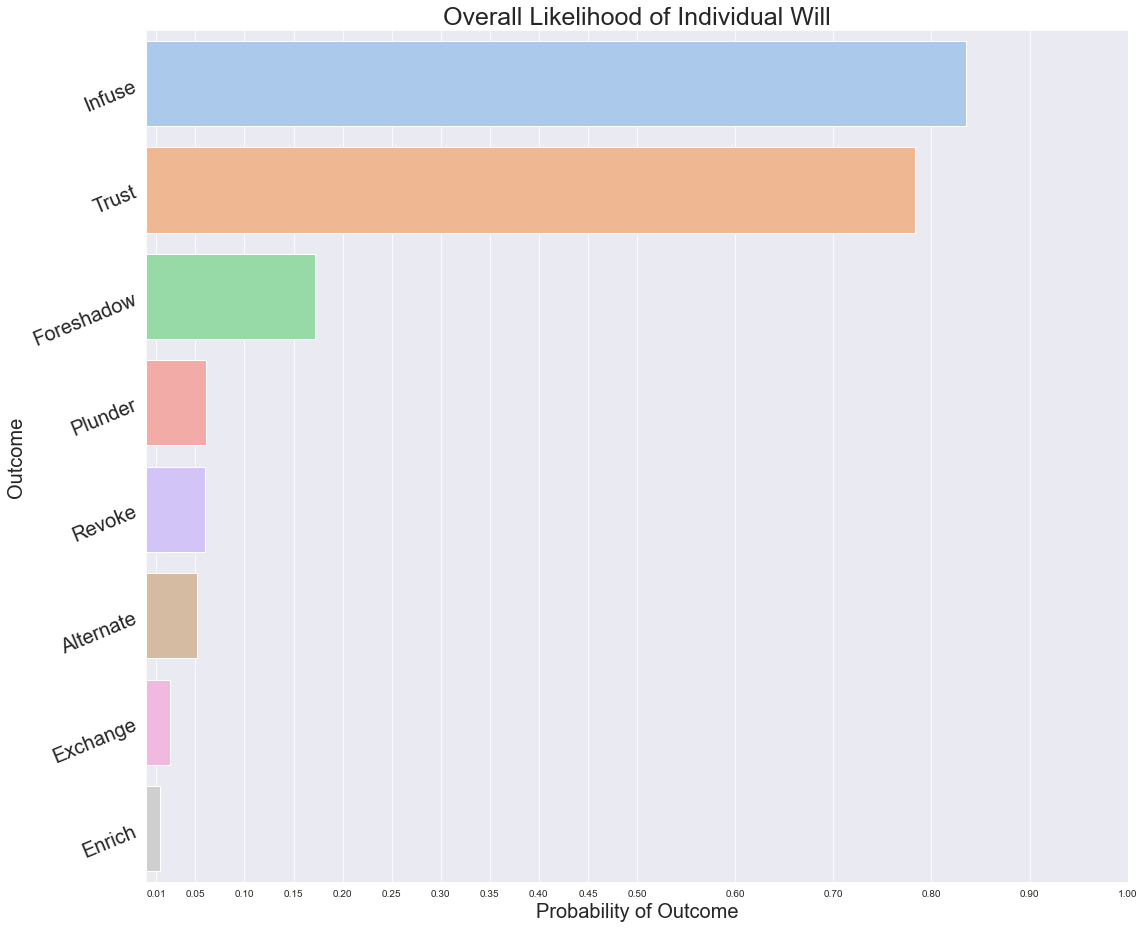

In [67]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=most_likely_wills,x='prob',y=most_likely_wills.index, orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Probability of Outcome', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Overall Likelihood of Individual Will', fontsize='25')
plt.xticks([.01,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.60,.70,.80,.90,1])
plt.xlim(0,1)
plt.savefig(f'./{season_folder}/Magic_Wills_Individual.png', format='png');

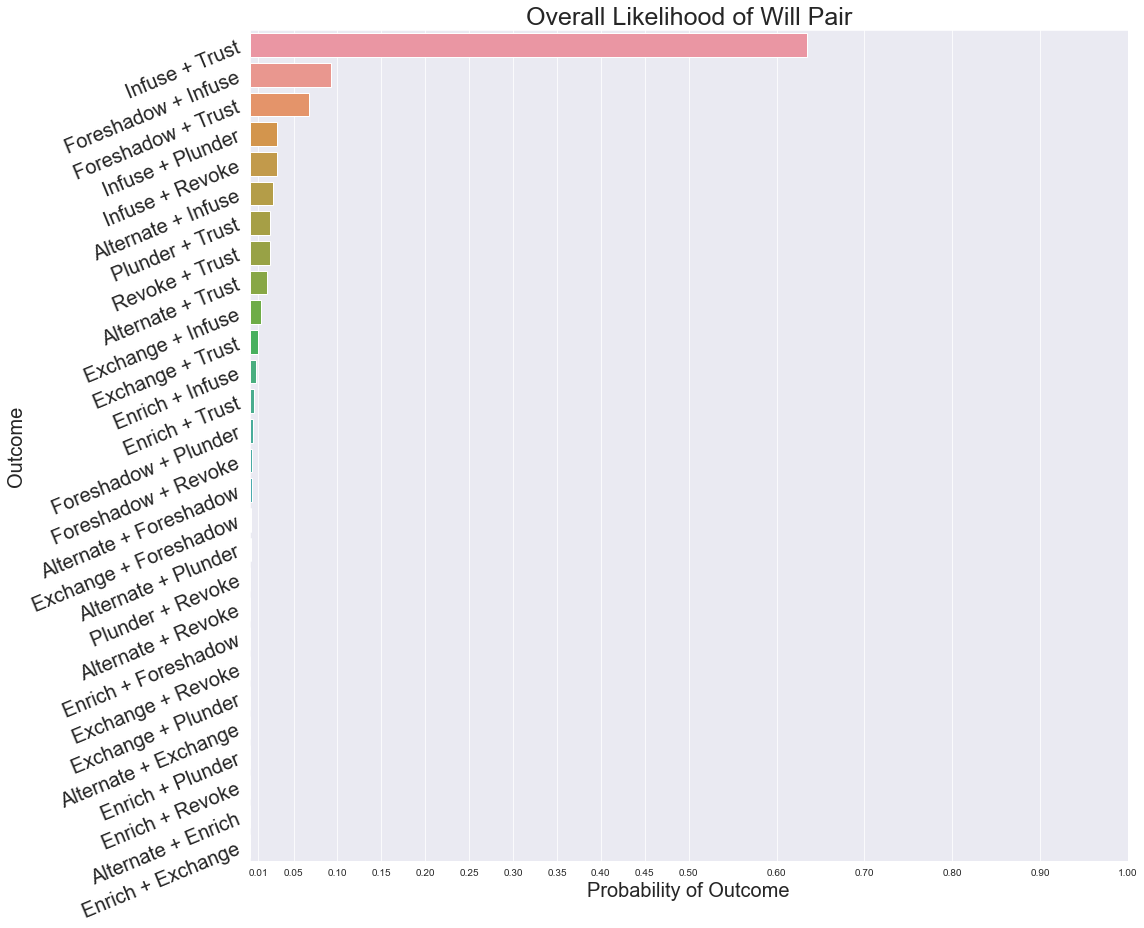

In [68]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=most_likely_wills_general,x='relative_prob',y=most_likely_wills_general.index, orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Probability of Outcome', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Overall Likelihood of Will Pair', fontsize='25')
plt.xticks([.01,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.60,.70,.80,.90,1])
plt.xlim(0,1)
plt.savefig(f'./{season_folder}/Magic_Will_Pairs.png', format='png');

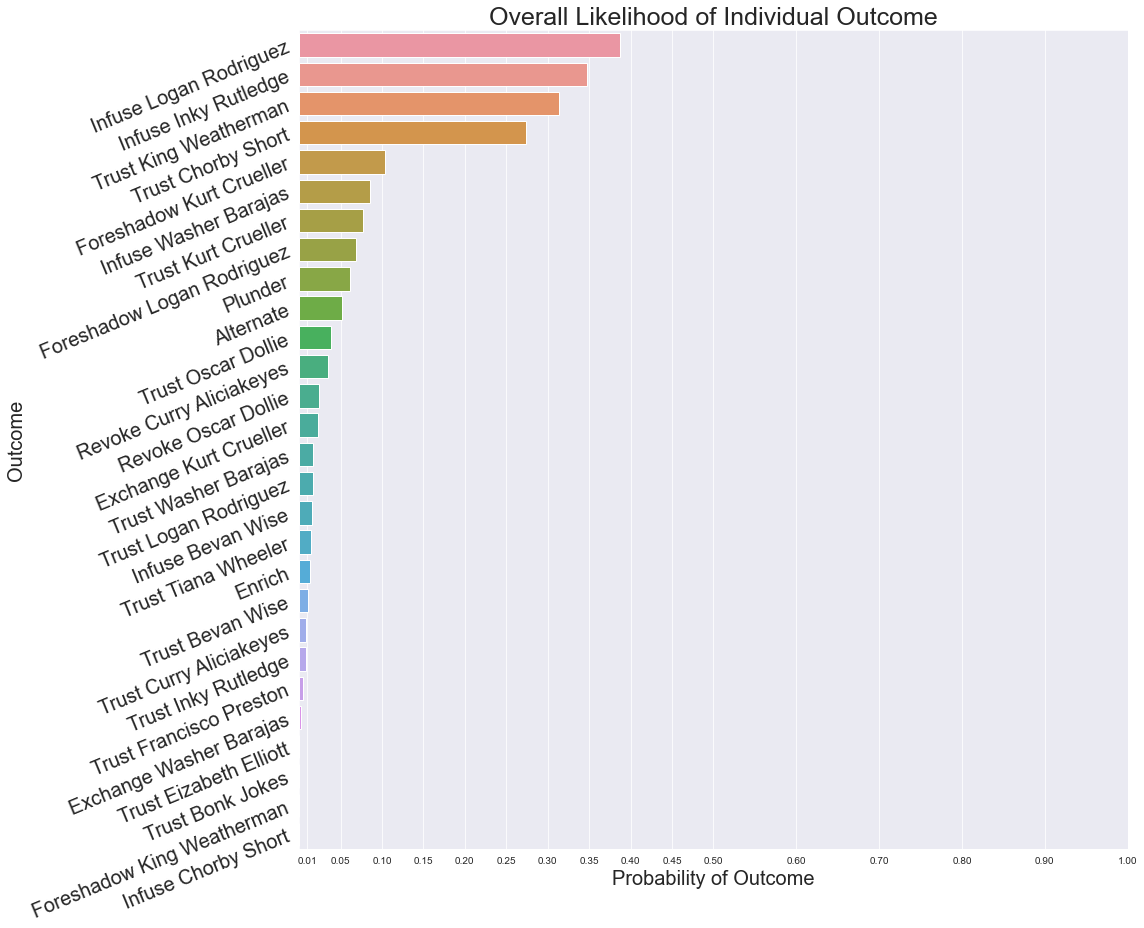

In [69]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=overall_probs_df,x='prob',y=overall_probs_df.index, orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Probability of Outcome', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Overall Likelihood of Individual Outcome', fontsize='25')
plt.xticks([.01,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.60,.70,.80,.90,1])
plt.xlim(0,1)
plt.savefig(f'./{season_folder}/Magic_Wills_Individual_Names.png', format='png');

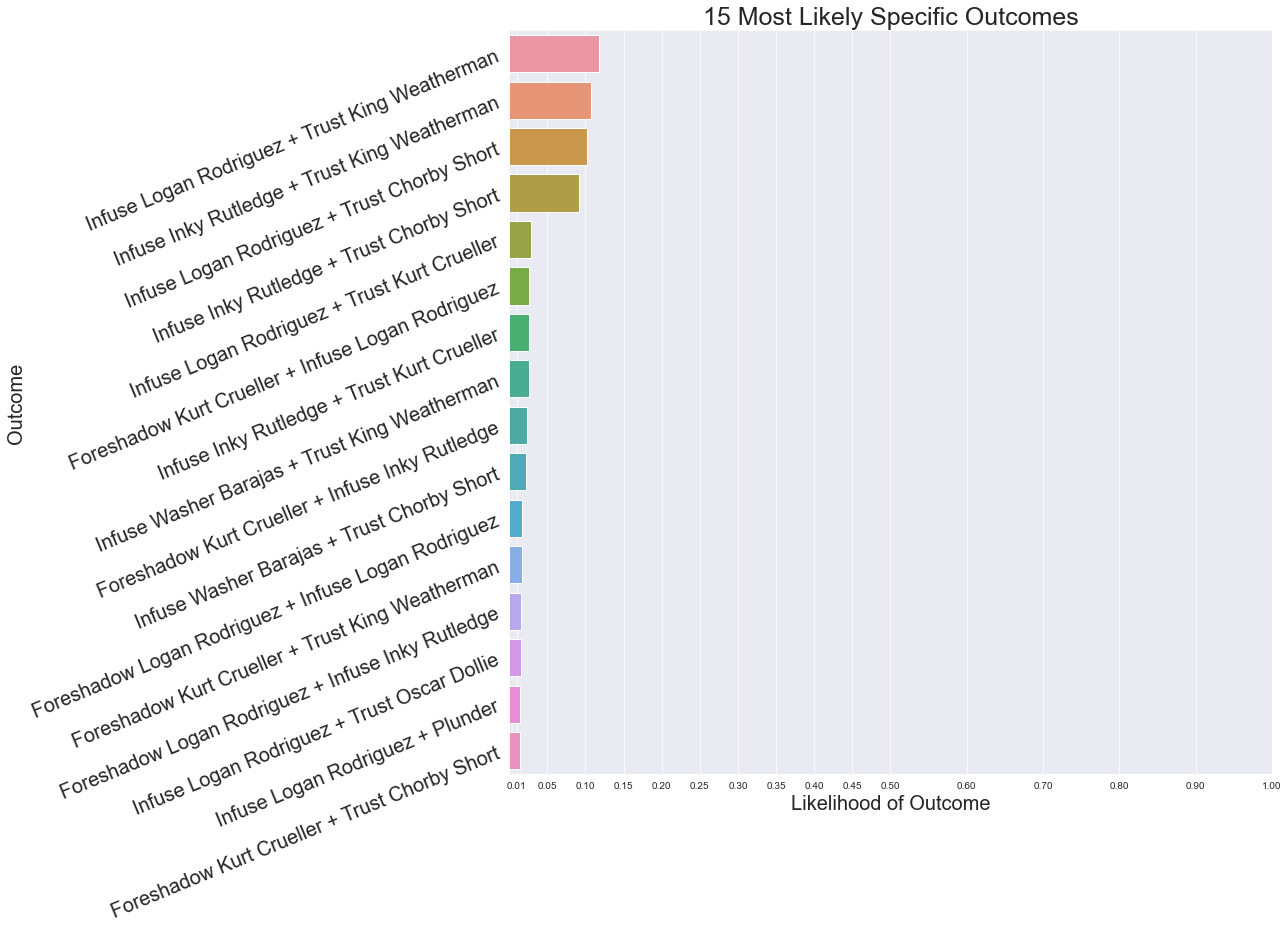

In [71]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(18,13))
sns.barplot(data=wills.loc[0:15,:],x='relative_prob',y='will_combo', orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Likelihood of Outcome', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('15 Most Likely Specific Outcomes', fontsize='25')
plt.xticks([.01,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.60,.70,.80,.90,1])
plt.xlim(0,1)
plt.savefig(f'./{season_folder}/Magic_Wills_Top15.png', format='png');

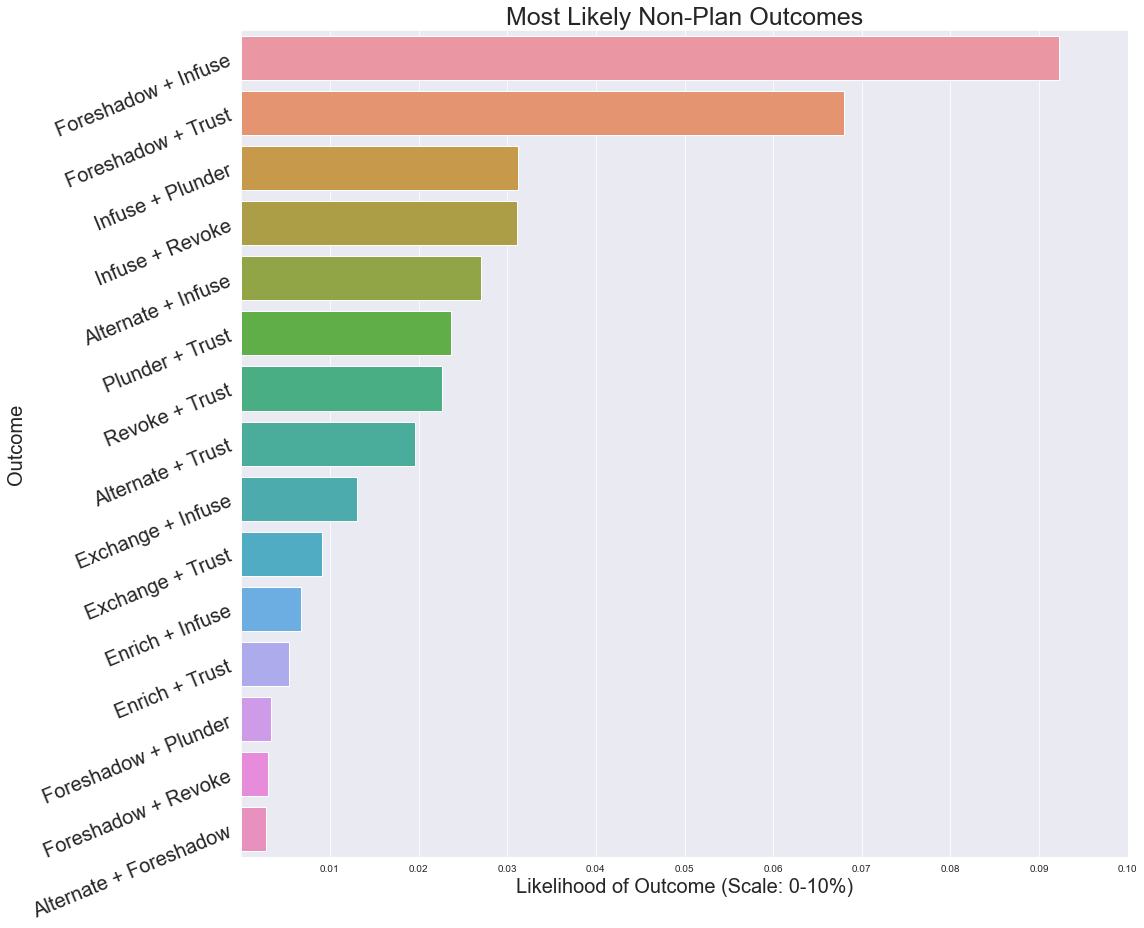

In [72]:
sns.set_style('darkgrid')
sns.set_palette('pastel')
plt.figure(figsize=(16,13))
sns.barplot(data=most_likely_wills_general[1:16],x='relative_prob',y=most_likely_wills_general.index[1:16], orient='h')
plt.yticks(rotation=22.5, fontsize='20')
plt.xlabel('Likelihood of Outcome (Scale: 0-10%)', fontsize='20')
plt.ylabel('Outcome', fontsize='20')
plt.title('Most Likely Non-Plan Outcomes', fontsize='25')
plt.xticks([.01,.02,.03,.04,.05,.06,.07,.08,.09,.1])
plt.xlim(0,.1)
plt.savefig(f'./{season_folder}/Magic_Wills_Non_Plan.png', format='png');